<a href="https://colab.research.google.com/github/ZiyuWang1121/Collaborative-Workspace-System/blob/main/Data%5CData_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Simulation

In [38]:
!pip install faker

In [39]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from faker import Faker

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Function Definition

### Employees

In [41]:
# Initialization
fake = Faker()
fake.seed_instance(42)
np.random.seed(42)
random.seed(42)

def generate_skills_catalog():
    # Generate a standardized skills catalog
    skills_data = {
        # Programming Languages
        'Python', 'JavaScript', 'Java', 'C++', 'C#', 'Ruby', 'Go', 'Rust', 'PHP', 'Swift',
        # Web Technologies
        'HTML', 'CSS', 'React', 'Vue.js', 'Angular', 'Node.js', 'Django', 'Flask', 'Spring', 'Express.js',
        # Database & Cloud
        'SQL', 'MySQL', 'PostgreSQL', 'MongoDB', 'Redis', 'AWS', 'Docker', 'Kubernetes', 'Azure', 'GCP',
        # Data Science & AI
        'Machine Learning', 'TensorFlow', 'PyTorch', 'Data Analysis', 'Pandas', 'NumPy', 'R', 'Tableau',
        # DevOps & Tools
        'Git', 'Jenkins', 'CI/CD', 'Linux', 'Bash', 'REST API', 'GraphQL', 'Microservices',
        # Soft Skills
        'Project Management', 'Agile', 'Scrum', 'Communication', 'Leadership', 'Problem Solving'
    }

    skills_df = pd.DataFrame([
        {'skill_id': f'SKL-{i:03d}', 'skill_name': skill, 'category': categorize_skill(skill)}
        for i, skill in enumerate(sorted(skills_data), 1)
    ])
    return skills_df

def categorize_skill(skill):
    # Categorize skills into broader categories
    categories = {
        'Programming Language': ['Python', 'JavaScript', 'Java', 'C++', 'C#', 'Ruby', 'Go', 'Rust', 'PHP', 'Swift'],
        'Web Development': ['HTML', 'CSS', 'React', 'Vue.js', 'Angular', 'Node.js', 'Django', 'Flask', 'Spring', 'Express.js'],
        'Database & Cloud': ['SQL', 'MySQL', 'PostgreSQL', 'MongoDB', 'Redis', 'AWS', 'Docker', 'Kubernetes', 'Azure', 'GCP'],
        'Data Science': ['Machine Learning', 'TensorFlow', 'PyTorch', 'Data Analysis', 'Pandas', 'NumPy', 'R', 'Tableau'],
        'DevOps & Tools': ['Git', 'Jenkins', 'CI/CD', 'Linux', 'Bash', 'REST API', 'GraphQL', 'Microservices'],
        'Soft Skills': ['Project Management', 'Agile', 'Scrum', 'Communication', 'Leadership', 'Problem Solving']
    }

    for category, skills in categories.items():
        if skill in skills:
            return category
    return 'Other'

def get_random_skills(skills_catalog, min_skills=2, max_skills=6):
    # Randomly select skills from the catalog
    n_skills = random.randint(min_skills, max_skills)
    selected_skills = skills_catalog.sample(n=n_skills)['skill_name'].tolist()
    return "; ".join(selected_skills)

def generate_employees_with_skills(n_employees=50, max_skills_per_employee=8):
    # Generate employee data with skills directly in the dataframe
    job_titles = [
        'Software Engineer', 'Senior Software Engineer', 'Frontend Developer', 'Backend Developer',
        'Full Stack Developer', 'Data Scientist', 'DevOps Engineer', 'Product Manager',
        'UI/UX Designer', 'Data Analyst', 'System Architect', 'Project Manager'
    ]

    # Get skills catalog
    skills_catalog = generate_skills_catalog()
    skill_names = skills_catalog['skill_name'].tolist()

    employees = []
    for i in range(n_employees):
        emp_id = f"EMP-{100 + i}"
        job_title = random.choice(job_titles)
        experience = np.random.randint(1, 15)

        # Performance rating based on experience with some randomness
        base_performance = min(3.0 + (experience * 0.15), 4.8)
        performance = round(np.random.normal(base_performance, 0.3), 1)
        performance = max(2.5, min(5.0, performance))

        # Generate realistic contact information
        name = fake.name()
        email = f"{name.lower().replace(' ', '.')}@company.com"

        # Generate skills for this employee
        n_skills = min(
            max_skills_per_employee,
            max(3, int(experience * 0.8) + np.random.randint(1, 4))
        )

        selected_skills = random.sample(skill_names, n_skills)

        # Generate proficiency levels for each skill
        skill_proficiencies = {}
        for skill in selected_skills:
            base_proficiency = min(3 + (experience * 0.3), 5)
            proficiency = int(np.random.normal(base_proficiency, 0.8))
            proficiency = max(1, min(5, proficiency))
            skill_proficiencies[skill] = proficiency

        # Convert skills to string format for CSV
        skills_string = "; ".join([f"{skill}:{proficiency}" for skill, proficiency in skill_proficiencies.items()])

        employees.append({
            'employee_id': emp_id,
            'name': name,
            'job_title': job_title,
            'experience_years': experience,
            'performance_rating': performance,
            'email': email,
            'department': random.choice(['Engineering', 'Data Science', 'Product', 'Design', 'DevOps']),
            'skills': skills_string,
            'total_skills': n_skills,
            'avg_proficiency': round(np.mean(list(skill_proficiencies.values())), 1)
        })

    return pd.DataFrame(employees)


### Projects

In [42]:
def generate_projects(n_projects=15):
    # Generate project data with highly diverse and unique descriptions

    # Expanded components for dynamic project description generation
    project_verbs = [
        "Develop", "Implement", "Build", "Create", "Design", "Launch",
        "Establish", "Construct", "Engineer", "Deploy", "Initiate", "Roll out",
        "Construct", "Formulate", "Institute", "Pioneer", "Introduce", "Construct"
    ]

    project_types = [
        "digital platform", "software solution", "enterprise system", "cloud infrastructure",
        "mobile application", "data analytics", "AI-powered tool", "blockchain network",
        "IoT ecosystem", "machine learning model", "microservices architecture", "API framework",
        "progressive web app", "real-time dashboard", "automation system", "security framework",
        "compliance tool", "monitoring solution", "reporting system", "integration hub"
    ]

    industries = [
        "financial services", "healthcare", "e-commerce", "manufacturing", "logistics",
        "telecommunications", "energy sector", "education technology", "insurance",
        "retail operations", "media entertainment", "travel hospitality", "real estate",
        "agricultural technology", "automotive industry", "pharmaceutical", "government",
        "non-profit", "gaming", "cybersecurity"
    ]

    business_objectives = [
        "streamline operational workflows", "enhance customer engagement", "optimize resource allocation",
        "accelerate decision-making processes", "improve data security measures", "reduce operational costs",
        "increase market competitiveness", "expand service offerings", "modernize legacy infrastructure",
        "strengthen compliance protocols", "boost productivity metrics", "facilitate global expansion",
        "improve user experience", "enable real-time insights", "automate manual processes",
        "enhance scalability capabilities", "drive innovation initiatives", "optimize supply chain",
        "improve product quality", "strengthen data governance"
    ]

    technical_approaches = [
        "microservices architecture", "cloud-native development", "containerization strategy",
        "event-driven design patterns", "API-first methodology", "serverless computing framework",
        "agile development practices", "DevOps implementation", "continuous delivery pipeline",
        "domain-driven design principles", "test-driven development", "infrastructure as code",
        "zero-trust security model", "responsive design system", "progressive enhancement",
        "component-based architecture", "reactive programming", "functional programming paradigm",
        "machine learning pipelines", "data mesh architecture"
    ]

    key_features = [
        "real-time analytics dashboard", "automated workflow engine", "seamless third-party integrations",
        "responsive user interface", "advanced security protocols", "scalable infrastructure",
        "intuitive user experience", "comprehensive reporting suite", "mobile-optimized design",
        "predictive analytics capabilities", "AI-assisted functionality", "blockchain verification",
        "voice-enabled interactions", "augmented reality features", "natural language processing",
        "computer vision integration", "edge computing capabilities", "distributed ledger technology",
        "quantum-resistant cryptography", "federated learning system"
    ]

    challenges = [
        "legacy system integration", "regulatory compliance requirements", "performance optimization",
        "data migration complexities", "cross-team coordination", "aggressive timeline constraints",
        "budget allocation limitations", "technical debt resolution", "vendor management",
        "security vulnerability mitigation", "user adoption strategies", "integration complexity",
        "data privacy concerns", "scalability challenges", "technology stack modernization",
        "team skill development", "change management", "quality assurance processes",
        "documentation standards", "disaster recovery planning"
    ]

    success_metrics = [
        "improved system performance", "enhanced user satisfaction", "reduced operational costs",
        "increased processing speed", "better data accuracy", "higher system availability",
        "improved security posture", "faster time-to-market", "increased customer retention",
        "better resource utilization", "enhanced compliance status", "improved scalability",
        "reduced maintenance overhead", "increased automation rate", "better decision support",
        "improved team productivity", "enhanced data insights", "reduced error rates",
        "increased system reliability", "better user engagement"
    ]

    def generate_unique_project_description():
        verb = random.choice(project_verbs)
        project_type = random.choice(project_types)
        industry = random.choice(industries)
        objective = random.choice(business_objectives)
        approach = random.choice(technical_approaches)
        feature = random.choice(key_features)
        challenge = random.choice(challenges)
        metric = random.choice(success_metrics)

        description_templates = [
            f"{verb} a comprehensive {project_type} for the {industry} sector designed to {objective}. "
            f"Leveraging {approach}, this initiative will deliver {feature} while addressing {challenge}, "
            f"ultimately achieving {metric}.",

            f"{verb} an innovative {project_type} targeting {industry} clients with the primary goal to {objective}. "
            f"Built on {approach} principles, the solution incorporates {feature} and navigates {challenge} "
            f"to deliver measurable outcomes including {metric}.",

            f"{verb} a scalable {project_type} platform serving {industry} organizations to {objective}. "
            f"Utilizing {approach} methodology, this project introduces {feature} while overcoming {challenge} "
            f"and demonstrating success through {metric}.",

            f"{verb} an enterprise-grade {project_type} for the {industry} market focused on {objective}. "
            f"Employing {approach} strategy, the implementation features {feature}, manages {challenge}, "
            f"and targets key performance indicators such as {metric}.",

            f"{verb} a cutting-edge {project_type} solution in the {industry} domain aimed at {objective}. "
            f"Based on {approach} framework, this endeavor delivers {feature}, mitigates {challenge}, "
            f"and drives business value through {metric}.",

            f"{verb} a robust {project_type} infrastructure for {industry} applications to {objective}. "
            f"Following {approach} best practices, the system includes {feature}, addresses {challenge}, "
            f"and optimizes for outcomes like {metric}.",

            f"{verb} an intelligent {project_type} ecosystem serving {industry} needs to {objective}. "
            f"Through {approach} implementation, the platform offers {feature}, resolves {challenge}, "
            f"and enhances operational efficiency via {metric}.",

            f"{verb} a next-generation {project_type} framework for the {industry} industry to {objective}. "
            f"Using {approach} techniques, the architecture provides {feature}, handles {challenge}, "
            f"and improves business metrics including {metric}."
        ]

        return random.choice(description_templates)

    def generate_project_name():
        adjectives = [
            "Quantum", "Nexus", "Apex", "Vertex", "Synergy", "Catalyst", "Momentum",
            "Horizon", "Pinnacle", "Summit", "Vanguard", "Frontier", "Genesis", "Odyssey",
            "Evolution", "Innovation", "Transformation", "Revolution", "Acceleration"
        ]

        nouns = [
            "Platform", "Solution", "System", "Framework", "Initiative", "Program",
            "Enterprise", "Digital", "Cloud", "Data", "AI", "Intelligence", "Analytics",
            "Automation", "Integration", "Transformation", "Modernization", "Optimization"
        ]

        domains = [
            "Pro", "Plus", "Enterprise", "360", "Elite", "Premium", "Advanced", "Next",
            "X", "One", "Core", "Edge", "Prime", "Ultimate", "Max", "Unlimited"
        ]

        return f"{random.choice(adjectives)} {random.choice(nouns)} {random.choice(domains)}"

    projects = []
    start_date = datetime(2024, 1, 1)
    skills_catalog = generate_skills_catalog()
    used_descriptions = set()

    for i in range(n_projects):
        proj_id = f"PROJ-{i+1:03d}"

        # Generate unique description (ensure no duplicates)
        description = generate_unique_project_description()
        retry_count = 0
        while description in used_descriptions and retry_count < 20:
            description = generate_unique_project_description()
            retry_count += 1
        used_descriptions.add(description)

        # Enhanced project metrics with more variations
        complexity_score = np.random.choice([3,4,5,6,7,8,9,10], p=[0.05,0.1,0.15,0.2,0.2,0.15,0.1,0.05])
        #team_size = np.random.choice([2,3,4,5,6,8,10,12,15], p=[0.05,0.1,0.15,0.2,0.15,0.1,0.1,0.1,0.05])

        # Timeline
        base_timeline = max(2, complexity_score + np.random.randint(-1, 3))
        if complexity_score >= 8:
            base_timeline += np.random.randint(1, 4)
        estimated_timeline_months = base_timeline

        # Budget with different cost structures
        #base_monthly_cost = random.choice([1200, 1500, 1800, 2000, 2200])
        #base_budget = estimated_timeline_months * team_size * base_monthly_cost
        #complexity_multiplier = 1 + (complexity_score - 5) * 0.25
        #project_budget_usd = int(base_budget * complexity_multiplier)

        # Team experience level
        base_experience = max(2.0, 4.5 + np.random.normal(0, 0.6))
        team_experience_level = round(max(1.0, min(5.0, base_experience)), 1)

        # Priority with business context
        if complexity_score >= 8:
            priority_weights = [0.05, 0.15, 0.3]
        elif complexity_score <= 4:
            priority_weights = [0.4, 0.3, 0.2]
        else:
            priority_weights = [0.2, 0.3, 0.3]

        priority = random.choices([1, 2, 3], weights=priority_weights)[0]
        priority_labels = {1: 'Low', 2: 'Medium', 3: 'High'}

        # Calculate project dates
        project_start = start_date + timedelta(days=np.random.randint(0, 90))
        project_deadline = project_start + timedelta(days=int(estimated_timeline_months * 30))

        # Generate required skills for the project
        required_skills = get_random_skills(skills_catalog, min_skills=4, max_skills=8)

        # Generate unique project name
        project_name = generate_project_name()

        projects.append({
            'project_id': proj_id,
            'project_name': project_name,
            'description': description,
            'start_date': project_start.strftime('%Y-%m-%d'),
            'deadline': project_deadline.strftime('%Y-%m-%d'),
            'status': random.choice(['Not Started', 'In Progress', 'Completed', 'On Hold']),
            'manager_id': f"EMP-{100 + np.random.randint(0, 20)}",

            # Enhanced project metrics
            #'Team_Size': team_size,
            #'Project_Budget_USD': project_budget_usd,
            'Estimated_Timeline_Months': estimated_timeline_months,
            'Complexity_Score': complexity_score,
            'Team_Experience_Level': team_experience_level,
            'Priority': priority_labels[priority],
            'Priority_Score': priority,

            # Required skills for the project
            'required_skillsets': required_skills
        })

    return pd.DataFrame(projects)

### Tasks

In [43]:
def generate_tasks(projects_df, employees_df, n_tasks_per_project_range=(5, 15)):

    # Expanded components for dynamic task description generation
    task_verbs = [
        "Implement", "Develop", "Build", "Create", "Design", "Optimize",
        "Refactor", "Configure", "Deploy", "Test", "Document", "Review",
        "Migrate", "Integrate", "Secure", "Monitor", "Troubleshoot", "Analyze"
    ]

    task_focus_areas = [
        "authentication system", "payment processing", "data analytics", "reporting dashboard",
        "notification service", "search functionality", "admin interface", "mobile application",
        "API gateway", "database management", "caching layer", "file upload service",
        "real-time messaging", "analytics tracking", "customer portal", "inventory system",
        "order management", "billing system", "compliance reporting", "performance monitoring"
    ]

    technical_details = [
        "including database schema design and API endpoints",
        "with comprehensive error handling and logging",
        "following responsive design principles",
        "using modern authentication protocols",
        "with real-time data synchronization",
        "including unit and integration tests",
        "with performance optimization techniques",
        "following security best practices",
        "using containerization technologies",
        "with automated deployment pipelines",
        "including documentation and user guides",
        "with monitoring and alerting setup"
    ]

    quality_requirements = [
        "ensuring cross-browser compatibility",
        "meeting accessibility standards",
        "following coding conventions",
        "with comprehensive test coverage",
        "including performance benchmarks",
        "following security guidelines",
        "with code review completion",
        "including user acceptance testing",
        "following DevOps practices",
        "with quality assurance approval"
    ]

    def generate_unique_task_description():
        # Generate a unique task description by combining different components
        verb = random.choice(task_verbs)
        focus = random.choice(task_focus_areas)
        detail = random.choice(technical_details)
        quality = random.choice(quality_requirements)

        description_templates = [
            f"{verb} the {focus} {detail}. This task must be completed {quality}.",

            f"{verb} comprehensive {focus} solution {detail}. Deliverables should include {quality}.",

            f"{verb} robust {focus} functionality {detail}. Ensure all work meets {quality} standards.",

            f"{verb} scalable {focus} implementation {detail}. Final delivery requires {quality}.",

            f"{verb} enterprise-grade {focus} {detail}. The solution must demonstrate {quality}."
        ]

        return random.choice(description_templates)

    def generate_task_name(description):
        # Generate task name from description
        # Extract the main components from description
        words = description.split()
        if len(words) >= 4:
            return f"{words[0]} {words[2]} {words[3]}"
        return "Technical Implementation Task"

    # Rest of the function remains the same for skill-based logic
    def extract_employee_skills(employee_row):
        skills_dict = {}
        if pd.notna(employee_row['skills']):
            for skill_item in employee_row['skills'].split('; '):
                if ':' in skill_item:
                    skill, level = skill_item.split(':')
                    skills_dict[skill.strip()] = int(level)
        return skills_dict

    def get_skills_by_category(skills_catalog, categories, max_skills=3):
        skills_in_categories = skills_catalog[skills_catalog['category'].isin(categories)]
        if len(skills_in_categories) > 0:
            selected_skills = skills_in_categories.sample(n=min(max_skills, len(skills_in_categories)))
            return selected_skills['skill_name'].tolist()
        return []

    def generate_skill_based_requirements(assigned_employee_skills, template_categories, skills_catalog):
        high_proficiency_skills = [skill for skill, level in assigned_employee_skills.items() if level >= 4]
        category_skills = get_skills_by_category(skills_catalog, template_categories, max_skills=2)
        all_possible_skills = list(set(high_proficiency_skills + category_skills))

        if len(all_possible_skills) >= 2:
            selected_skills = random.sample(all_possible_skills, min(3, len(all_possible_skills)))
        else:
            selected_skills = get_skills_by_category(skills_catalog, template_categories, max_skills=3)

        return "; ".join(selected_skills)

    tasks = []
    task_id_counter = 1000
    skills_catalog = generate_skills_catalog()

    # Pre-cache employee skills
    employee_skills_cache = {}
    for _, emp in employees_df.iterrows():
        employee_skills_cache[emp['employee_id']] = extract_employee_skills(emp)

    # Skill categories mapping (simplified)
    skill_category_mapping = {
        'authentication': ['Security', 'Programming Language'],
        'payment': ['Programming Language', 'Database & Cloud'],
        'data analytics': ['Database & Cloud', 'Programming Language'],
        'reporting': ['Web Development', 'Database & Cloud'],
        'notification': ['DevOps & Tools', 'Programming Language'],
        'search': ['Programming Language', 'Database & Cloud'],
        'admin': ['Web Development', 'Programming Language'],
        'mobile': ['Web Development', 'Programming Language'],
        'API': ['DevOps & Tools', 'Programming Language'],
        'database': ['Database & Cloud', 'Programming Language'],
        'caching': ['Database & Cloud', 'DevOps & Tools'],
        'file': ['Programming Language', 'Database & Cloud'],
        'messaging': ['DevOps & Tools', 'Programming Language'],
        'analytics': ['Database & Cloud', 'Programming Language'],
        'portal': ['Web Development', 'Programming Language'],
        'inventory': ['Database & Cloud', 'Programming Language'],
        'order': ['Programming Language', 'Database & Cloud'],
        'billing': ['Programming Language', 'Database & Cloud'],
        'compliance': ['Security', 'Programming Language'],
        'performance': ['Database & Cloud', 'Programming Language']
    }

    used_task_descriptions = set()

    for _, project in projects_df.iterrows():
        n_tasks = np.random.randint(*n_tasks_per_project_range)

        for _ in range(n_tasks):
            task_id = f"TASK-{task_id_counter}"
            task_id_counter += 1

            # Generate unique task description
            task_description = generate_unique_task_description()
            while task_description in used_task_descriptions and len(used_task_descriptions) < 200:
                task_description = generate_unique_task_description()
            used_task_descriptions.add(task_description)

            task_name = generate_task_name(task_description)

            # Extract focus area for skill mapping
            focus_key = next((key for key in skill_category_mapping.keys()
                            if key in task_description.lower()), 'programming')
            skill_categories = skill_category_mapping.get(focus_key, ['Programming Language', 'Database & Cloud'])

            # Task complexity influenced by project complexity
            base_complexity = max(1, min(5, np.random.randint(1, 6) + (project['Complexity_Score'] - 5) // 2))

            # Estimate duration and budget
            base_duration = base_complexity * 3 + np.random.randint(1, 7)
            estimated_duration = base_duration
            hourly_rate = 10
            estimated_budget = int(estimated_duration * 3 * hourly_rate * (1 + base_complexity * 0.1))

            status_options = ['Unassigned', 'Assigned', 'In Progress', 'Completed', 'Blocked']
            status_weights = [0.1, 0.4, 0.3, 0.15, 0.05]
            task_status = random.choices(status_options, weights=status_weights)[0]

            assigned_employee_id = None
            assigned_employee_name = None
            required_skills = ""

            # Skill-based task generation
            if task_status != 'Unassigned':
                assigned_employee_id = random.choice(employees_df['employee_id'].tolist())
                assigned_employee_name = employees_df[employees_df['employee_id'] == assigned_employee_id]['name'].iloc[0]
                assigned_employee_skills = employee_skills_cache[assigned_employee_id]
                required_skills = generate_skill_based_requirements(
                    assigned_employee_skills, skill_categories, skills_catalog
                )
            else:
                required_skills = "; ".join(get_skills_by_category(skills_catalog, skill_categories, max_skills=3))

            # Determine category
            category_mapping = {'Web Development': 'Frontend', 'Programming Language': 'Backend',
                              'Database & Cloud': 'Database', 'DevOps & Tools': 'DevOps',
                              'Security': 'Security', 'System Design': 'Design'}
            primary_category = skill_categories[0] if skill_categories else 'Backend'
            task_category = category_mapping.get(primary_category, 'Backend')

            tasks.append({
                'task_id': task_id,
                'project_id': project['project_id'],
                'task_name': task_name,
                'task_description': task_description,
                'complexity': base_complexity,
                'category': task_category,
                'estimated_duration': estimated_duration,
                'estimated_budget': estimated_budget,
                'status': task_status,
                'assigned_to_id': assigned_employee_id,
                'assigned_to_name': assigned_employee_name,
                'required_skillsets': required_skills
            })

    return pd.DataFrame(tasks)


## Generate Sample Data

In [44]:
def calculate_project_budgets(projects_df, tasks_df):
    # calc sum of task budget
    project_budgets = tasks_df.groupby('project_id')['estimated_budget'].sum().reset_index()
    project_budgets.columns = ['project_id', 'Project_Budget_USD']

    projects_with_budgets = projects_df.merge(project_budgets, on='project_id', how='left')
    projects_with_budgets['Project_Budget_USD'] = projects_with_budgets['Project_Budget_USD'].fillna(0)

    cols = list(projects_with_budgets.columns)

    return projects_with_budgets[cols]

In [45]:
skills_df = generate_skills_catalog()

# testing
# employees_df = generate_employees_with_skills(50)
# projects_df = generate_projects(15)

employees_df = generate_employees_with_skills(300)
f_projects_df = generate_projects(1000)

tasks_df = generate_tasks(f_projects_df, employees_df)

projects_df = calculate_project_budgets(f_projects_df, tasks_df)

In [46]:
skills_df.head()

,skill_id,skill_name,category
0,SKL-001,AWS,Database & Cloud
1,SKL-002,Agile,Soft Skills
2,SKL-003,Angular,Web Development
3,SKL-004,Azure,Database & Cloud
4,SKL-005,Bash,DevOps & Tools


In [47]:
employees_df.head()

,employee_id,name,job_title,experience_years,performance_rating,email,department,skills,total_skills,avg_proficiency
0,EMP-100,Allison Hill,System Architect,7,3.9,allison.hill@company.com,Data Science,CI/CD:5; Agile:4; Spring:5; Go:4; GCP:4; Flask:4,6,4.3
1,EMP-101,Noah Rhodes,Project Manager,3,3.3,noah.rhodes@company.com,Engineering,C++:3; Ruby:3; Spring:3; PostgreSQL:3,4,3.0
2,EMP-102,Angie Henderson,Data Analyst,10,4.4,angie.henderson@company.com,Engineering,Microservices:4; Angular:5; Agile:3; C#:4; Exp...,8,4.2
3,EMP-103,Daniel Wagner,UI/UX Designer,4,3.5,daniel.wagner@company.com,Data Science,Docker:4; SQL:5; React:3; Rust:4; PostgreSQL:3...,6,3.7
4,EMP-104,Cristian Santos,Product Manager,4,3.7,cristian.santos@company.com,Data Science,PyTorch:2; Go:3; Vue.js:4; AWS:4; Swift:5,5,3.6


In [48]:
projects_df.head()

,project_id,project_name,description,start_date,deadline,status,manager_id,Estimated_Timeline_Months,Complexity_Score,Team_Experience_Level,Priority,Priority_Score,required_skillsets,Project_Budget_USD
0,PROJ-001,Summit AI Unlimited,Introduce a robust automation system infrastru...,2024-03-25,2024-09-21,Completed,EMP-106,6,7,4.9,Low,1,GraphQL; Project Management; Swift; Kubernetes...,4065
1,PROJ-002,Acceleration Digital Plus,Pioneer a comprehensive digital platform for t...,2024-01-19,2024-05-18,On Hold,EMP-100,4,4,4.5,Medium,2,Swift; C#; Django; Go; Jenkins; Azure,4314
2,PROJ-003,Vanguard Automation Elite,Launch an innovative compliance tool targeting...,2024-02-20,2024-08-18,On Hold,EMP-116,6,6,4.5,Low,1,AWS; CSS; Bash; PHP; Tableau; Machine Learning...,4443
3,PROJ-004,Transformation Analytics Core,Establish an enterprise-grade real-time dashbo...,2024-03-01,2024-09-27,In Progress,EMP-117,7,6,5.0,Medium,2,Pandas; HTML; Redis; Machine Learning; Tableau...,4440
4,PROJ-005,Revolution Data Next,Institute an enterprise-grade monitoring solut...,2024-02-07,2025-01-02,Completed,EMP-105,11,10,3.8,High,3,React; PostgreSQL; SQL; Git; GCP; GraphQL,7158


In [49]:
tasks_df.head()

,task_id,project_id,task_name,task_description,complexity,category,estimated_duration,estimated_budget,status,assigned_to_id,assigned_to_name,required_skillsets
0,TASK-1000,PROJ-001,Integrate API gateway,Integrate enterprise-grade API gateway with re...,4,Backend,18,756,Blocked,EMP-371,Veronica Simpson,PHP; TensorFlow; MySQL
1,TASK-1001,PROJ-001,Create file upload,Create enterprise-grade file upload service us...,5,Security,16,720,In Progress,EMP-241,David Douglas Jr.,Leadership; PostgreSQL; Docker
2,TASK-1002,PROJ-001,Secure performance monitoring,Secure robust performance monitoring functiona...,4,Database,16,672,Unassigned,None,None,Go; C#; PostgreSQL
3,TASK-1003,PROJ-001,Develop database management,Develop comprehensive database management solu...,2,Security,11,396,Assigned,EMP-281,Tina Sanders,Django; Pandas; CI/CD
4,TASK-1004,PROJ-001,Deploy compliance reporting,Deploy scalable compliance reporting implement...,5,Frontend,17,765,In Progress,EMP-172,Brittney Phillips,Communication; GCP; Ruby


In [50]:
projects_df.shape

(1000, 14)

In [51]:
# Show assignment statistics
assigned_tasks = tasks_df[tasks_df['status'] == 'Assigned']
print(f"Assignment Statistics:")
print(f"Total tasks: {len(tasks_df)}")
print(f"Assigned tasks: {len(assigned_tasks)}")
print(f"Unassigned tasks: {len(tasks_df) - len(assigned_tasks)}")

Assignment Statistics:
Total tasks: 9420
Assigned tasks: 3638
Unassigned tasks: 5782


# Data Preprocessing

In [52]:
# Define original_stats dictionary
original_stats = {
    'employees': len(employees_df),
    'projects': len(projects_df),
    'tasks': len(tasks_df),
    'skills': len(skills_df)
}

# Initialize all 'clean' dataframes as copies of the original
employees_df_clean = employees_df.copy()
projects_df_clean = projects_df.copy()
tasks_df_clean = tasks_df.copy()


# 1. Check for missing values
for name, df in [('Employees', employees_df_clean), ('Projects', projects_df_clean),
                 ('Tasks', tasks_df_clean), ('Skills', skills_df)]:
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_info = pd.DataFrame({
        'Column': missing_data.index,
        'Missing_Count': missing_data.values,
        'Missing_Percent': missing_percent.values
    })
    missing_info = missing_info[missing_info['Missing_Count'] > 0]

    if len(missing_info) > 0:
        print(f"\n{name} Dataset - Missing Values:")
        print(missing_info.to_string(index=False))
    else:
        print(f"\n{name} Dataset: No missing values")



Employees Dataset: No missing values

Projects Dataset: No missing values

Tasks Dataset - Missing Values:
          Column  Missing_Count  Missing_Percent
  assigned_to_id            985        10.456476
assigned_to_name            985        10.456476

Skills Dataset: No missing values


In [53]:
# 2. Check for duplicates
for name, df, id_col in [('Employees', employees_df_clean, 'employee_id'),
                         ('Projects', projects_df_clean, 'project_id'),
                         ('Tasks', tasks_df_clean, 'task_id'),
                         ('Skills', skills_df, 'skill_id')]:
    # Check for duplicates based on the primary ID column
    duplicate_ids = df[df.duplicated(subset=[id_col], keep=False)]
    # Check for identical full rows
    duplicate_rows = df[df.duplicated(keep=False)]

    print(f"\n{name} Dataset:")
    print(f"  - Duplicate IDs (Primary Key violations): {len(duplicate_ids)}")
    print(f"  - Duplicate rows (Full row match): {len(duplicate_rows)}")


Employees Dataset:
  - Duplicate IDs (Primary Key violations): 0
  - Duplicate rows (Full row match): 0

Projects Dataset:
  - Duplicate IDs (Primary Key violations): 0
  - Duplicate rows (Full row match): 0

Tasks Dataset:
  - Duplicate IDs (Primary Key violations): 0
  - Duplicate rows (Full row match): 0

Skills Dataset:
  - Duplicate IDs (Primary Key violations): 0
  - Duplicate rows (Full row match): 0


In [54]:
# 3. Data type validation
# Employees data types
print("\nEmployees Data Types:")
print(employees_df_clean.dtypes)

# Projects date validation
try:
    # Apply conversion to the CLEAN dataframe
    projects_df_clean['start_date'] = pd.to_datetime(projects_df_clean['start_date'])
    projects_df_clean['deadline'] = pd.to_datetime(projects_df_clean['deadline'])
    print("Project dates converted successfully in projects_df_clean")
except Exception as e:
    print(f"Date conversion error: {e}")


Employees Data Types:
employee_id            object
name                   object
job_title              object
experience_years        int64
performance_rating    float64
email                  object
department             object
skills                 object
total_skills            int64
avg_proficiency       float64
dtype: object
Project dates converted successfully in projects_df_clean


In [55]:
# 4. Data consistency checks
# Check if assigned employees exist
valid_assignments = tasks_df_clean['assigned_to_id'].isin(employees_df_clean['employee_id'])
invalid_assignments = tasks_df_clean[~valid_assignments & tasks_df_clean['assigned_to_id'].notna()]
print(f"Invalid employee assignments (Assigned ID not in Employee list): {len(invalid_assignments)}")

# Check if project managers exist
valid_managers = projects_df_clean['manager_id'].isin(employees_df_clean['employee_id'])
invalid_managers = projects_df_clean[~valid_managers]
print(f"Invalid project managers (Manager ID not in Employee list): {len(invalid_managers)}")

# Check if task projects exist
valid_task_projects = tasks_df_clean['project_id'].isin(projects_df_clean['project_id'])
invalid_task_projects = tasks_df_clean[~valid_task_projects]
print(f"Invalid project references in tasks (Project ID not in Project list): {len(invalid_task_projects)}")

Invalid employee assignments (Assigned ID not in Employee list): 0
Invalid project managers (Manager ID not in Employee list): 0
Invalid project references in tasks (Project ID not in Project list): 0


In [56]:
# 5. Data cleaning
tasks_df_clean_initial_len = len(tasks_df_clean)

# Remove invalid assignments
# We keep valid assignments OR rows where the assigned_to_id is missing (NaN/NaT)
tasks_df_clean = tasks_df_clean[valid_assignments | tasks_df_clean['assigned_to_id'].isna()].copy()
removed_assignments = tasks_df_clean_initial_len - len(tasks_df_clean)
print(f"Removed {removed_assignments} tasks with invalid employee assignments")

# Remove invalid project references
tasks_df_clean_after_assignment_removal = len(tasks_df_clean)
tasks_df_clean = tasks_df_clean[tasks_df_clean['project_id'].isin(projects_df_clean['project_id'])].copy()
removed_projects = tasks_df_clean_after_assignment_removal - len(tasks_df_clean)
print(f"Removed {removed_projects} tasks with invalid project references")

# Fix project managers (assign random valid manager if invalid)
if len(invalid_managers) > 0:
    valid_managers_list = employees_df_clean['employee_id'].tolist()
    if valid_managers_list:
        projects_df_clean.loc[~valid_managers, 'manager_id'] = np.random.choice(valid_managers_list, size=len(invalid_managers))
        print(f"Fixed {len(invalid_managers)} invalid project managers by assigning a random valid ID.")
    else:
        print("Cannot fix invalid project managers: No valid employees to assign.")


Removed 0 tasks with invalid employee assignments
Removed 0 tasks with invalid project references


In [57]:
# 6. Outlier detection
# Numerical columns for outlier analysis
numerical_checks = {
    'Employees': ['experience_years', 'performance_rating'], # Assuming these are numeric
    'Projects': ['Project_Budget_USD', 'Estimated_Timeline_Months', 'Complexity_Score'],
    'Tasks': ['complexity', 'estimated_duration', 'estimated_budget']
}

for dataset, columns in numerical_checks.items():
    print(f"\n{dataset} Outliers:")

    # Safer assignment logic using initialized clean dataframes
    if dataset == 'Employees':
        df = employees_df_clean
    elif dataset == 'Projects':
        df = projects_df_clean
    else: # dataset == 'Tasks'
        df = tasks_df_clean

    for col in columns:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # Drop NaN values for accurate IQR calculation
            col_data = df[col].dropna()

            if len(col_data) > 0:
                Q1 = col_data.quantile(0.25)
                Q3 = col_data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                # Check outliers against the bounds
                outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
                print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")
            else:
                print(f"  {col}: No data or all data is non-numeric/missing.")



Employees Outliers:
  experience_years: 0 outliers (0.0%)
  performance_rating: 0 outliers (0.0%)

Projects Outliers:
  Project_Budget_USD: 1 outliers (0.1%)
  Estimated_Timeline_Months: 0 outliers (0.0%)
  Complexity_Score: 0 outliers (0.0%)

Tasks Outliers:
  complexity: 0 outliers (0.0%)
  estimated_duration: 0 outliers (0.0%)
  estimated_budget: 0 outliers (0.0%)


In [58]:
# 7. Data validation rules
# Use clean dataframes for final validation
validation_checks = [
    ("Employee experience years (0-50)", employees_df_clean['experience_years'].between(0, 50).all()),
    ("Employee performance rating (1-5)", employees_df_clean['performance_rating'].between(1, 5).all()),
    ("Project complexity score (1-10)", projects_df_clean['Complexity_Score'].between(1, 10).all()),
    ("Task complexity (1-5)", tasks_df_clean['complexity'].between(1, 5).all()),
    ("Positive project budget values", (projects_df_clean['Project_Budget_USD'] > 0).all()),
    ("Positive task duration", (tasks_df_clean['estimated_duration'] > 0).all())
]

for check_name, check_result in validation_checks:
    status = True if check_result else False
    print(f"  {status} {check_name}")


  True Employee experience years (0-50)
  True Employee performance rating (1-5)
  True Project complexity score (1-10)
  True Task complexity (1-5)
  True Positive project budget values
  True Positive task duration


In [59]:
# 8. Data quality summary
print(f"Original data sizes: {original_stats}")
print(f"Cleaned data sizes:")
print(f"  - Employees: {len(employees_df_clean)}")
print(f"  - Projects: {len(projects_df_clean)}")
print(f"  - Tasks: {len(tasks_df_clean)}")
print(f"  - Skills: {len(skills_df)}")

Original data sizes: {'employees': 300, 'projects': 1000, 'tasks': 9420, 'skills': 52}
Cleaned data sizes:
  - Employees: 300
  - Projects: 1000
  - Tasks: 9420
  - Skills: 52


# EDA

## Descriptive Statistics

In [60]:
# Prepare data for EDA by adding necessary calculated columns
# Ensure projects have date columns as datetime
projects_df_clean['start_date'] = pd.to_datetime(projects_df_clean['start_date'])
projects_df_clean['deadline'] = pd.to_datetime(projects_df_clean['deadline'])

# Add duration_days column if it doesn't exist
if 'duration_days' not in projects_df_clean.columns:
    projects_df_clean['duration_days'] = (projects_df_clean['deadline'] - projects_df_clean['start_date']).dt.days

In [61]:
# descriptive statistics

# Employees
print("\n1. EMPLOYEES DESCRIPTIVE STATISTICS:")
emp_numeric = employees_df_clean[['experience_years', 'performance_rating', 'total_skills', 'avg_proficiency']]
print(emp_numeric.describe())

print(f"\nDepartment Distribution:")
print(employees_df_clean['department'].value_counts())

print(f"\nJob Title Distribution:")
print(employees_df_clean['job_title'].value_counts())

# 2. Projects
print("\n2. PROJECTS DESCRIPTIVE STATISTICS:")
proj_columns = ['Project_Budget_USD', 'Estimated_Timeline_Months', 'Complexity_Score', 'Team_Experience_Level']
if 'duration_days' in projects_df_clean.columns:
    proj_columns.append('duration_days')

proj_numeric = projects_df_clean[proj_columns]
print(proj_numeric.describe())

print(f"\nProject Status Distribution:")
print(projects_df_clean['status'].value_counts())

print(f"\nProject Priority Distribution:")
print(projects_df_clean['Priority'].value_counts())

# 3. Tasks
print("\n3. TASKS DESCRIPTIVE STATISTICS:")
task_numeric = tasks_df_clean[['complexity', 'estimated_duration', 'estimated_budget']]
print(task_numeric.describe())

print(f"\nTask Status Distribution:")
print(tasks_df_clean['status'].value_counts())

print(f"\nTask Category Distribution:")
print(tasks_df_clean['category'].value_counts())

# 4. Key metrics summary
print("\n4. KEY METRICS SUMMARY:")
print(f"Total Employees: {len(employees_df_clean)}")
print(f"Total Projects: {len(projects_df_clean)}")
print(f"Total Tasks: {len(tasks_df_clean)}")
print(f"Total Budget (Projects): ${projects_df_clean['Project_Budget_USD'].sum():,}")
print(f"Total Budget (Tasks): ${tasks_df_clean['estimated_budget'].sum():,}")
#print(f"Average Team Size: {projects_df_clean['Team_Size'].mean():.1f}")

if 'duration_days' in projects_df_clean.columns:
    print(f"Average Project Duration: {projects_df_clean['duration_days'].mean():.1f} days")


1. EMPLOYEES DESCRIPTIVE STATISTICS:
       experience_years  performance_rating  total_skills  avg_proficiency
count        300.000000          300.000000    300.000000       300.000000
mean           7.776667            4.095000      6.460000         4.046333
std            4.181516            0.645132      1.934133         0.621052
min            1.000000            2.500000      3.000000         2.000000
25%            4.000000            3.600000      5.000000         3.800000
50%            8.000000            4.200000      8.000000         4.200000
75%           11.000000            4.600000      8.000000         4.500000
max           14.000000            5.000000      8.000000         5.000000

Department Distribution:
department
Engineering     76
Data Science    69
Design          60
Product         48
DevOps          47
Name: count, dtype: int64

Job Title Distribution:
job_title
UI/UX Designer              31
Data Analyst                30
Software Engineer           30
B

## Visualizations

In [62]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

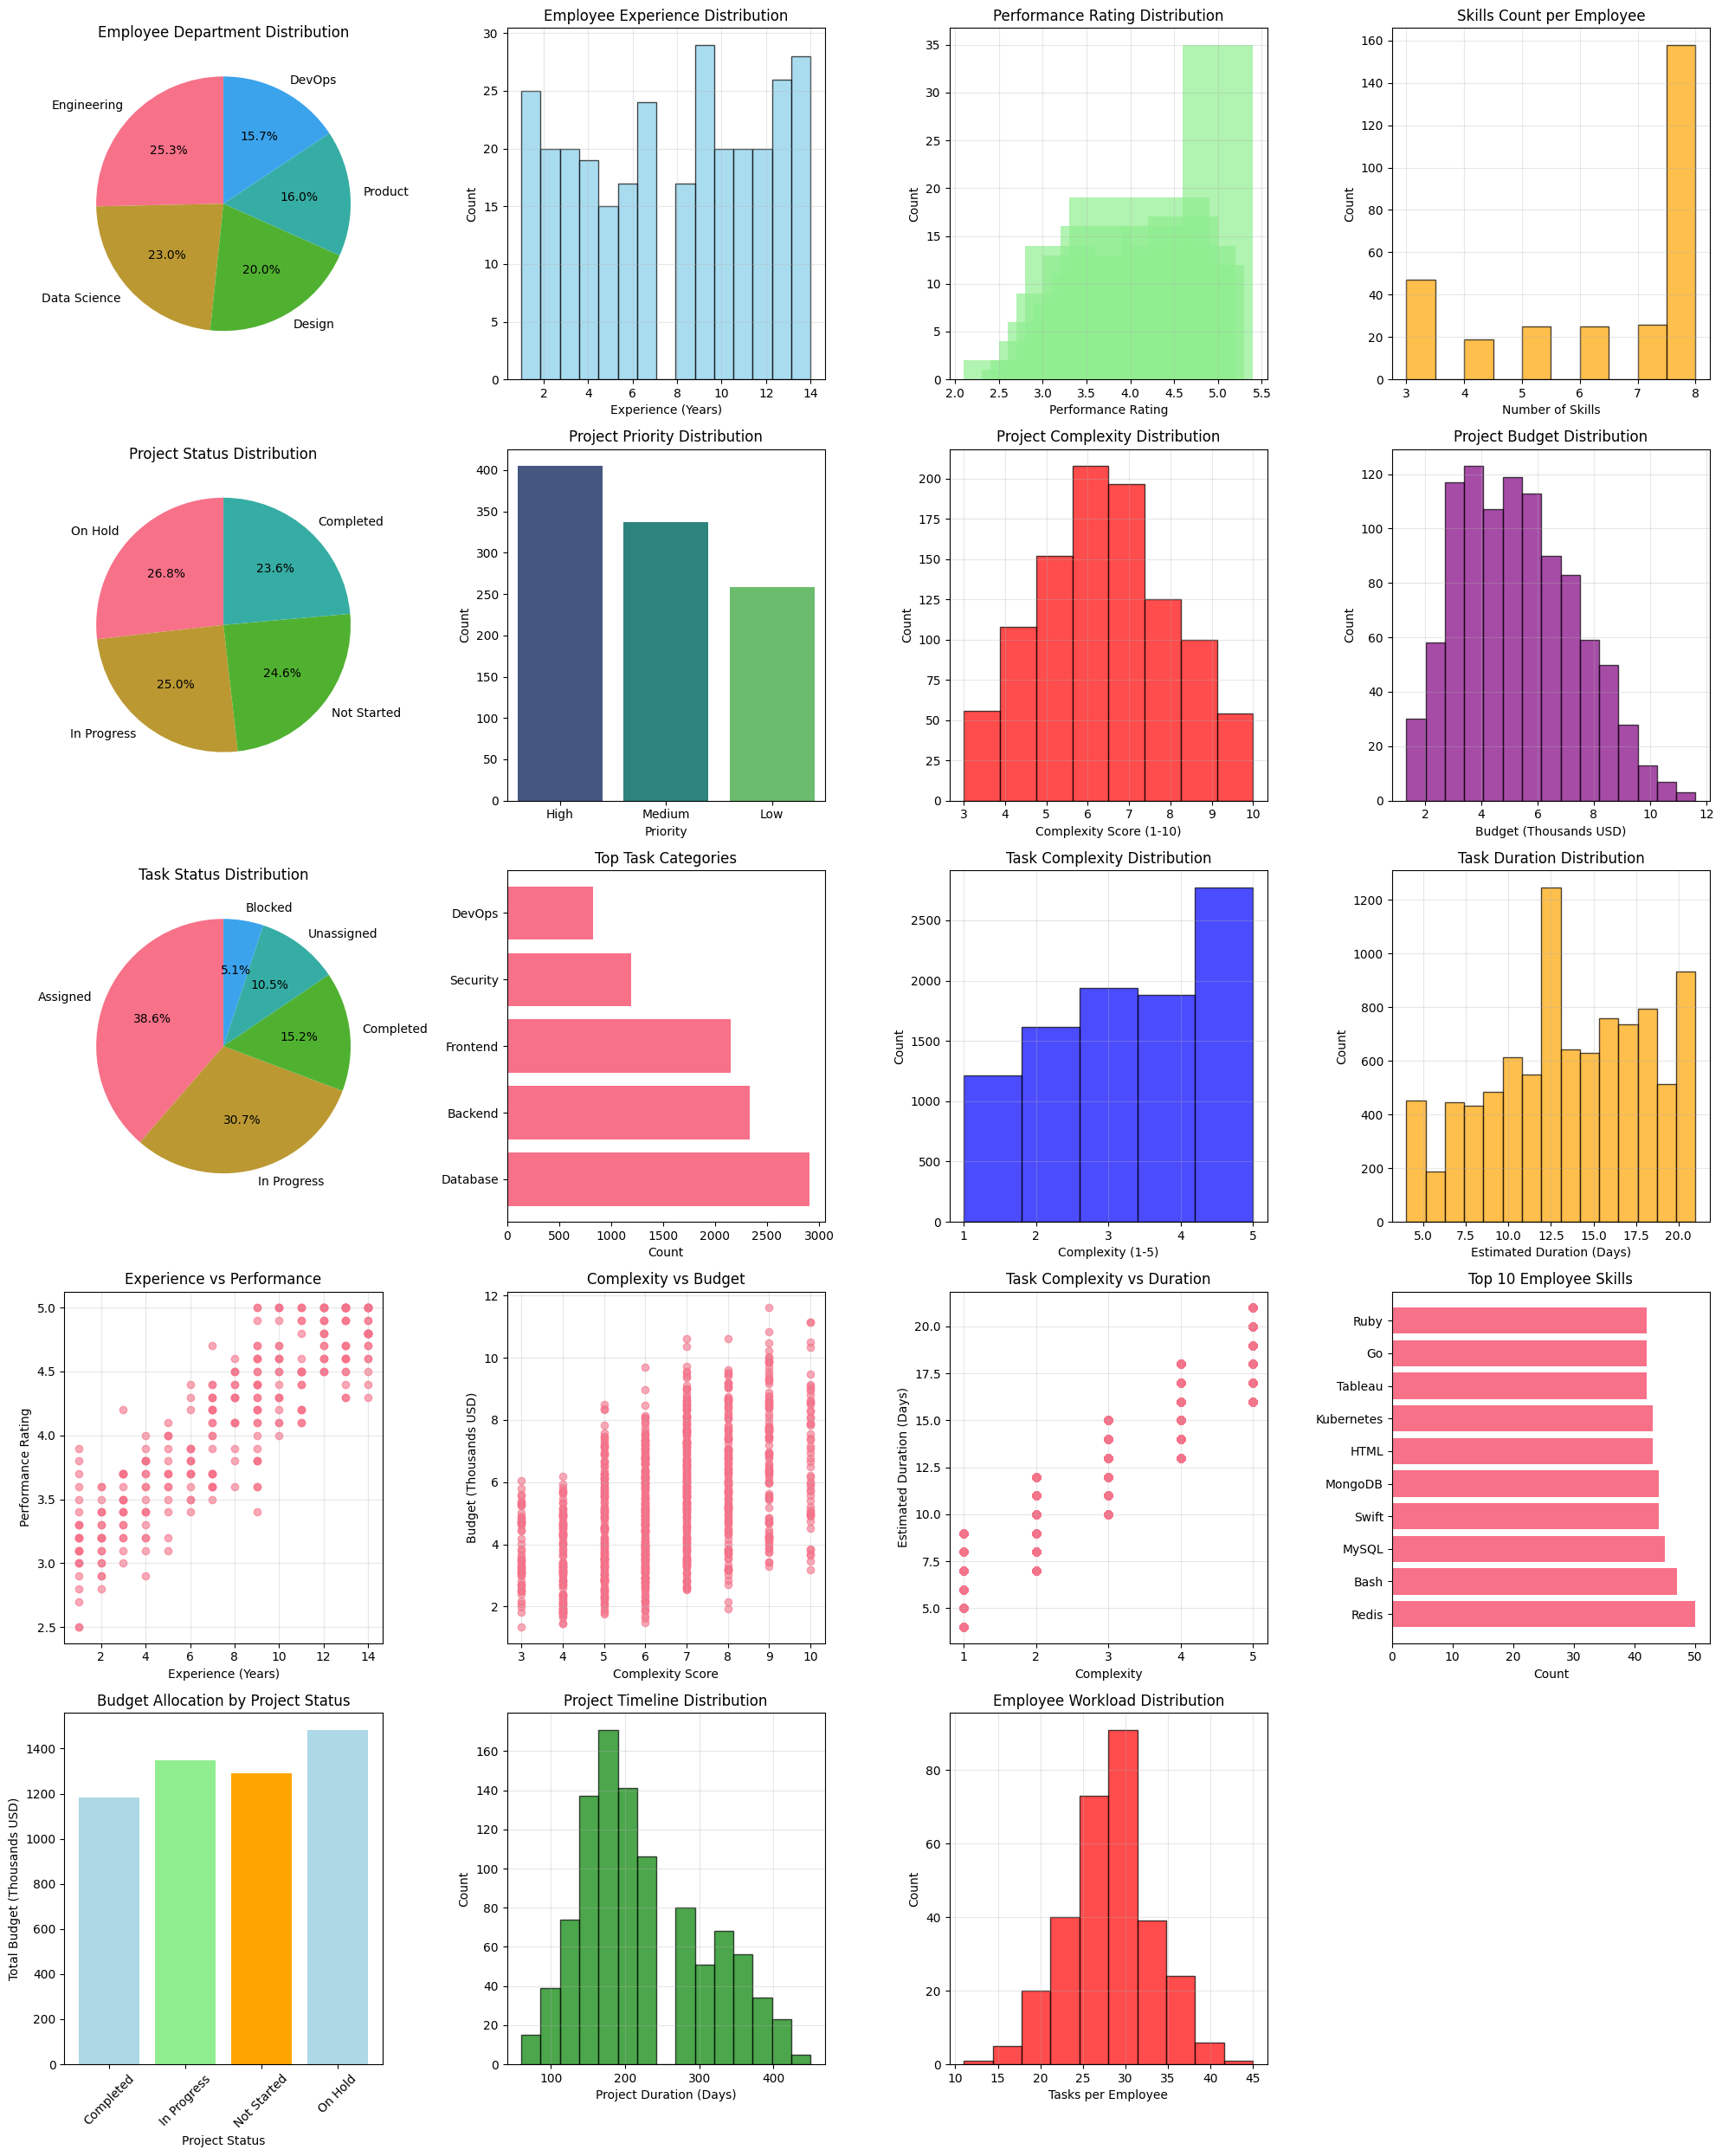

In [71]:
# Visualizations

fig = plt.figure(figsize=(20, 25))
gs = plt.GridSpec(5, 4, figure=fig)

# 1. Employee Analysis
ax1 = fig.add_subplot(gs[0, 0])  # Department distribution
ax2 = fig.add_subplot(gs[0, 1])  # Experience distribution
ax3 = fig.add_subplot(gs[0, 2])  # Performance distribution
ax4 = fig.add_subplot(gs[0, 3])  # Skills count

# 2. Project Analysis
ax5 = fig.add_subplot(gs[1, 0])  # Status distribution
ax6 = fig.add_subplot(gs[1, 1])  # Priority distribution
ax7 = fig.add_subplot(gs[1, 2])  # Complexity distribution
ax8 = fig.add_subplot(gs[1, 3])  # Budget distribution

# 3. Task Analysis (Third Row)
ax9 = fig.add_subplot(gs[2, 0])   # Task status
ax10 = fig.add_subplot(gs[2, 1])  # Task categories
ax11 = fig.add_subplot(gs[2, 2])  # Task complexity
ax12 = fig.add_subplot(gs[2, 3])  # Task duration

# 4. Relationship Analysis
ax13 = fig.add_subplot(gs[3, 0])  # Exp vs Performance
ax14 = fig.add_subplot(gs[3, 1])  # Complexity vs Budget
#ax15 = fig.add_subplot(gs[3, 2])  # Team Size vs Experience
ax16 = fig.add_subplot(gs[3, 2])  # Task complexity vs duration

# 5. Advanced Analysis
ax17 = fig.add_subplot(gs[3, 3])  # Skills distribution
ax18 = fig.add_subplot(gs[4, 0])  # Budget allocation
ax19 = fig.add_subplot(gs[4, 1])  # Timeline analysis
ax20 = fig.add_subplot(gs[4, 2])  # Workload distribution

# Employee Visualizations
# 1. Department distribution
dept_counts = employees_df_clean['department'].value_counts()
ax1.pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Employee Department Distribution')

# 2. Experience distribution
ax2.hist(employees_df_clean['experience_years'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
ax2.set_xlabel('Experience (Years)')
ax2.set_ylabel('Count')
ax2.set_title('Employee Experience Distribution')
ax2.grid(True, alpha=0.3)

# 3. Performance distribution
performance_counts = employees_df_clean['performance_rating'].value_counts().sort_index()
ax3.bar(performance_counts.index, performance_counts.values, color='lightgreen', alpha=0.7)
ax3.set_xlabel('Performance Rating')
ax3.set_ylabel('Count')
ax3.set_title('Performance Rating Distribution')
ax3.grid(True, alpha=0.3)

# 4. Skills count distribution
ax4.hist(employees_df_clean['total_skills'], bins=10, edgecolor='black', alpha=0.7, color='orange')
ax4.set_xlabel('Number of Skills')
ax4.set_ylabel('Count')
ax4.set_title('Skills Count per Employee')
ax4.grid(True, alpha=0.3)

# Project Visualizations
# 5. Project status
status_counts = projects_df_clean['status'].value_counts()
ax5.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
ax5.set_title('Project Status Distribution')

# 6. Project priority
priority_counts = projects_df_clean['Priority'].value_counts()
sns.barplot(x=priority_counts.index, y=priority_counts.values, ax=ax6, palette='viridis')
ax6.set_xlabel('Priority')
ax6.set_ylabel('Count')
ax6.set_title('Project Priority Distribution')

# 7. Complexity distribution
ax7.hist(projects_df_clean['Complexity_Score'], bins=8, edgecolor='black', alpha=0.7, color='red')
ax7.set_xlabel('Complexity Score (1-10)')
ax7.set_ylabel('Count')
ax7.set_title('Project Complexity Distribution')
ax7.grid(True, alpha=0.3)

# 8. Budget distribution
ax8.hist(projects_df_clean['Project_Budget_USD'] / 1000, bins=15, edgecolor='black', alpha=0.7, color='purple')
ax8.set_xlabel('Budget (Thousands USD)')
ax8.set_ylabel('Count')
ax8.set_title('Project Budget Distribution')
ax8.grid(True, alpha=0.3)

# Task Visualizations
# 9. Task status
task_status_counts = tasks_df_clean['status'].value_counts()
ax9.pie(task_status_counts.values, labels=task_status_counts.index, autopct='%1.1f%%', startangle=90)
ax9.set_title('Task Status Distribution')

# 10. Task categories
category_counts = tasks_df_clean['category'].value_counts().head(8)
ax10.barh(range(len(category_counts)), category_counts.values)
ax10.set_yticks(range(len(category_counts)))
ax10.set_yticklabels(category_counts.index)
ax10.set_xlabel('Count')
ax10.set_title('Top Task Categories')

# 11. Task complexity
ax11.hist(tasks_df_clean['complexity'], bins=5, edgecolor='black', alpha=0.7, color='blue')
ax11.set_xlabel('Complexity (1-5)')
ax11.set_ylabel('Count')
ax11.set_title('Task Complexity Distribution')
ax11.grid(True, alpha=0.3)

# 12. Task duration
ax12.hist(tasks_df_clean['estimated_duration'], bins=15, edgecolor='black', alpha=0.7, color='orange')
ax12.set_xlabel('Estimated Duration (Days)')
ax12.set_ylabel('Count')
ax12.set_title('Task Duration Distribution')
ax12.grid(True, alpha=0.3)

# Relationship Analysis
# 13. Experience vs Performance
ax13.scatter(employees_df_clean['experience_years'], employees_df_clean['performance_rating'], alpha=0.6)
ax13.set_xlabel('Experience (Years)')
ax13.set_ylabel('Performance Rating')
ax13.set_title('Experience vs Performance')
ax13.grid(True, alpha=0.3)

# 14. Complexity vs Budget
ax14.scatter(projects_df_clean['Complexity_Score'], projects_df_clean['Project_Budget_USD'] / 1000, alpha=0.6)
ax14.set_xlabel('Complexity Score')
ax14.set_ylabel('Budget (Thousands USD)')
ax14.set_title('Complexity vs Budget')
ax14.grid(True, alpha=0.3)

# 15. Team Size vs Experience Level
#ax15.scatter(projects_df_clean['Team_Size'], projects_df_clean['Team_Experience_Level'], alpha=0.6)
#ax15.set_xlabel('Team Size')
#ax15.set_ylabel('Team Experience Level')
#ax15.set_title('Team Size vs Experience Level')
#ax15.grid(True, alpha=0.3)

# 16. Task complexity vs duration
ax16.scatter(tasks_df_clean['complexity'], tasks_df_clean['estimated_duration'], alpha=0.6)
ax16.set_xlabel('Complexity')
ax16.set_ylabel('Estimated Duration (Days)')
ax16.set_title('Task Complexity vs Duration')
ax16.grid(True, alpha=0.3)

# 17. Top skills distribution (from employees)
all_skills = []
for skills_str in employees_df_clean['skills'].dropna():
    skills = skills_str.split('; ')
    for skill in skills:
        if ':' in skill:
            skill_name = skill.split(':')[0]
            all_skills.append(skill_name)

skill_counts = pd.Series(all_skills).value_counts().head(10)
ax17.barh(range(len(skill_counts)), skill_counts.values)
ax17.set_yticks(range(len(skill_counts)))
ax17.set_yticklabels(skill_counts.index)
ax17.set_xlabel('Count')
ax17.set_title('Top 10 Employee Skills')

# 18. Budget allocation by project status
budget_by_status = projects_df_clean.groupby('status')['Project_Budget_USD'].sum() / 1000
ax18.bar(budget_by_status.index, budget_by_status.values, color=['lightblue', 'lightgreen', 'orange'])
ax18.set_xlabel('Project Status')
ax18.set_ylabel('Total Budget (Thousands USD)')
ax18.set_title('Budget Allocation by Project Status')
ax18.tick_params(axis='x', rotation=45)

# 19. Project timeline analysis
if 'duration_days' in projects_df_clean.columns:
    ax19.hist(projects_df_clean['duration_days'], bins=15, edgecolor='black', alpha=0.7, color='green')
    ax19.set_xlabel('Project Duration (Days)')
    ax19.set_ylabel('Count')
    ax19.set_title('Project Timeline Distribution')
    ax19.grid(True, alpha=0.3)
else:
    ax19.text(0.5, 0.5, 'Duration data\nnot available', ha='center', va='center', transform=ax19.transAxes)
    ax19.set_title('Project Timeline Distribution')

# 20. Employee workload distribution
assigned_tasks = tasks_df_clean[tasks_df_clean['status'] != 'Unassigned']
if len(assigned_tasks) > 0:
    employee_workload = assigned_tasks['assigned_to_id'].value_counts()
    ax20.hist(employee_workload.values, bins=10, edgecolor='black', alpha=0.7, color='red')
    ax20.set_xlabel('Tasks per Employee')
    ax20.set_ylabel('Count')
    ax20.set_title('Employee Workload Distribution')
    ax20.grid(True, alpha=0.3)
else:
    ax20.text(0.5, 0.5, 'No assigned tasks', ha='center', va='center', transform=ax20.transAxes)
    ax20.set_title('Employee Workload Distribution')

plt.tight_layout()
plt.show()




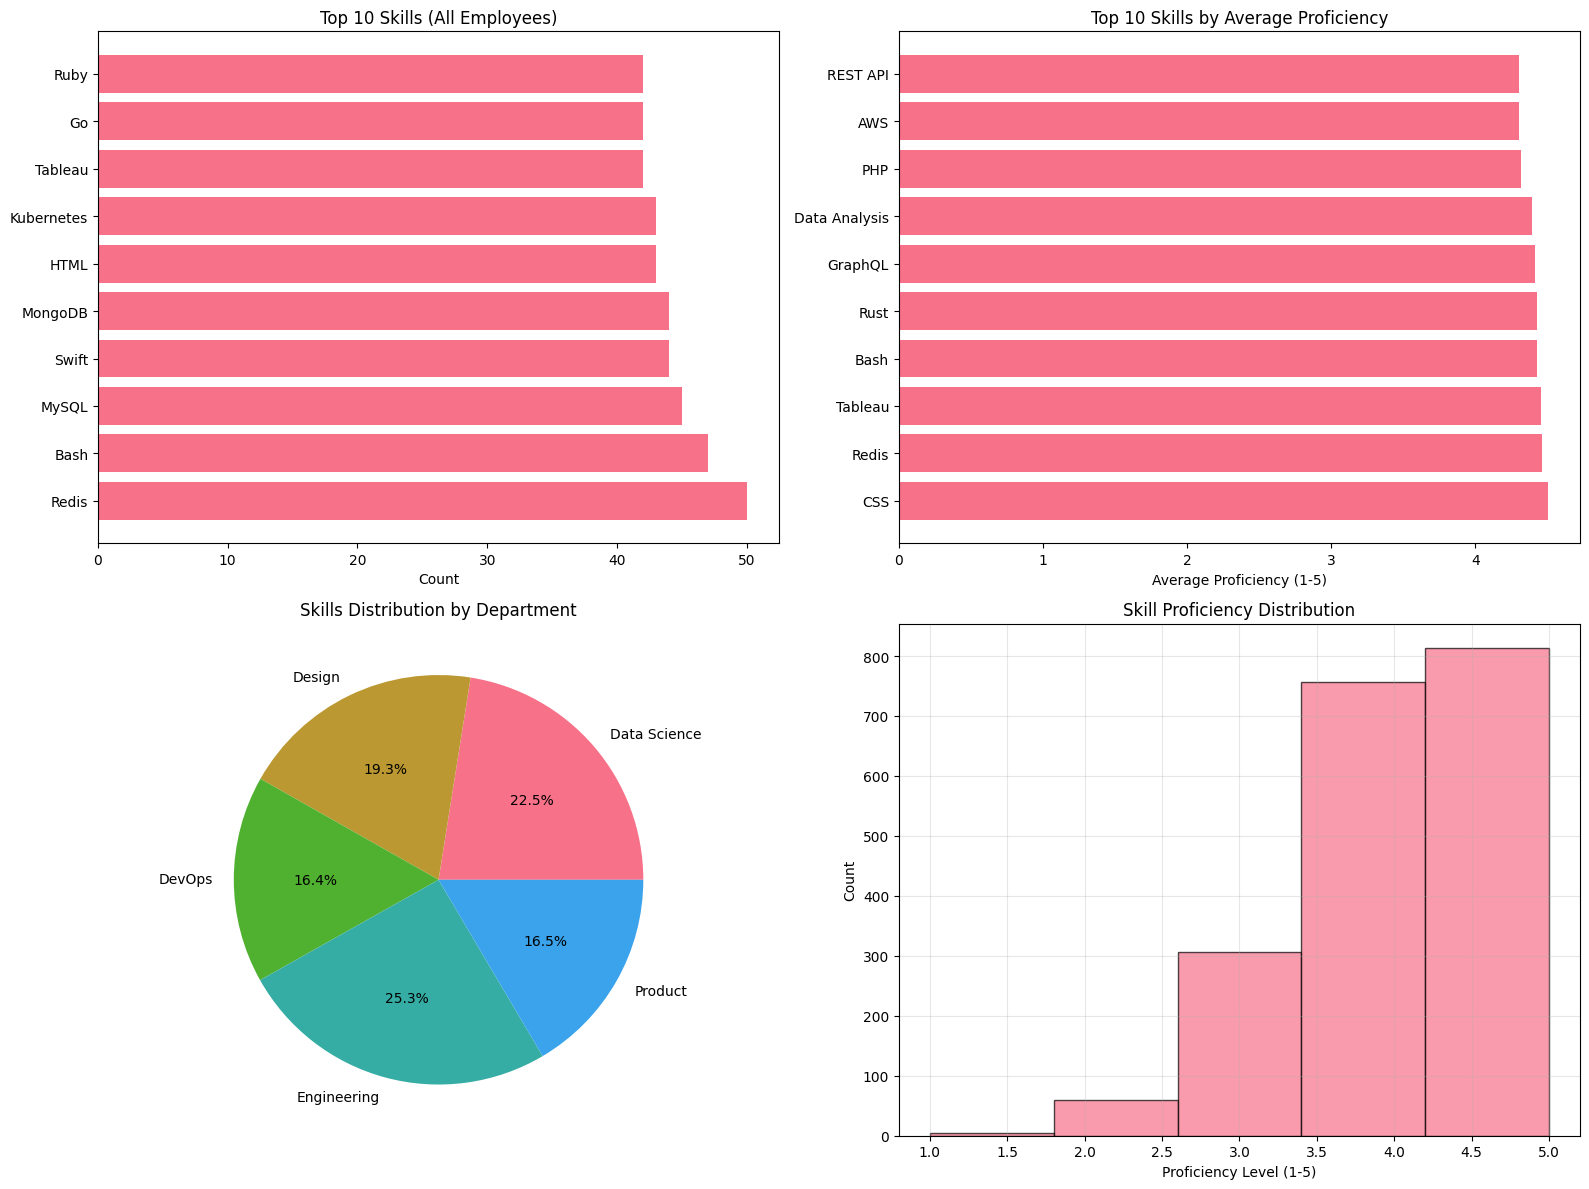

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Extract and analyze employee skills
employee_skills_data = []
for _, emp in employees_df_clean.iterrows():
    if pd.notna(emp['skills']):
        skills = emp['skills'].split('; ')
        for skill_item in skills:
            if ':' in skill_item:
                skill_name, proficiency = skill_item.split(':')
                employee_skills_data.append({
                    'employee_id': emp['employee_id'],
                    'skill': skill_name.strip(),
                    'proficiency': int(proficiency),
                    'department': emp['department']
                })

employee_skills_df = pd.DataFrame(employee_skills_data)

if not employee_skills_df.empty:
    # Top skills by count
    top_skills = employee_skills_df['skill'].value_counts().head(10)
    axes[0,0].barh(range(len(top_skills)), top_skills.values)
    axes[0,0].set_yticks(range(len(top_skills)))
    axes[0,0].set_yticklabels(top_skills.index)
    axes[0,0].set_xlabel('Count')
    axes[0,0].set_title('Top 10 Skills (All Employees)')

    # Average proficiency by skill
    avg_proficiency = employee_skills_df.groupby('skill')['proficiency'].mean().sort_values(ascending=False).head(10)
    axes[0,1].barh(range(len(avg_proficiency)), avg_proficiency.values)
    axes[0,1].set_yticks(range(len(avg_proficiency)))
    axes[0,1].set_yticklabels(avg_proficiency.index)
    axes[0,1].set_xlabel('Average Proficiency (1-5)')
    axes[0,1].set_title('Top 10 Skills by Average Proficiency')

    # Skills by department
    dept_skills = employee_skills_df.groupby(['department', 'skill']).size().unstack(fill_value=0)
    dept_skills.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', ax=axes[1,0])
    axes[1,0].set_title('Skills Distribution by Department')

    # Proficiency distribution
    axes[1,1].hist(employee_skills_df['proficiency'], bins=5, edgecolor='black', alpha=0.7)
    axes[1,1].set_xlabel('Proficiency Level (1-5)')
    axes[1,1].set_ylabel('Count')
    axes[1,1].set_title('Skill Proficiency Distribution')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [65]:
# Skills
if not employee_skills_df.empty:
    print(f"\nSkills Statistics:")
    print(f"Total unique skills: {employee_skills_df['skill'].nunique()}")
    print(f"Average proficiency: {employee_skills_df['proficiency'].mean():.2f}")
    print(f"Most common skill: {employee_skills_df['skill'].mode().iloc[0]}")
    if len(avg_proficiency) > 0:
        print(f"Highest proficiency skill: {avg_proficiency.index[0]} ({avg_proficiency.iloc[0]:.2f})\n")

assigned_tasks = tasks_df_clean[tasks_df_clean['status'] != 'Unassigned']
total_tasks = len(tasks_df_clean)
assignment_rate = len(assigned_tasks) / total_tasks * 100

# Assignment
print(f"Task Assignment Rate: {assignment_rate:.1f}%")
print(f"Unassigned Tasks: {total_tasks - len(assigned_tasks)}")
print(f"Assigned Tasks: {len(assigned_tasks)}\n")

completed_projects = projects_df_clean[projects_df_clean['status'] == 'Completed']
completion_rate = len(completed_projects) / len(projects_df_clean) * 100

print(f"Project Completion Rate: {completion_rate:.1f}%")
print(f"Active Projects: {len(projects_df_clean[projects_df_clean['status'] == 'In Progress'])}")
if 'duration_days' in projects_df_clean.columns:
    print(f"Average Project Duration: {projects_df_clean['duration_days'].mean():.1f} days")

# Budget
total_project_budget = projects_df_clean['Project_Budget_USD'].sum()
total_task_budget = tasks_df_clean['estimated_budget'].sum()
budget_utilization = total_task_budget / total_project_budget * 100

print(f"Total Project Budget: ${total_project_budget:,.0f}")
print(f"Total Task Budget: ${total_task_budget:,.0f}")
print(f"Budget Utilization: {budget_utilization:.1f}%\n")

# Skills gap
print(f"Average Employee Experience: {employees_df_clean['experience_years'].mean():.1f} years")
print(f"Average Performance Rating: {employees_df_clean['performance_rating'].mean():.1f}/5.0")
print(f"Average Skills per Employee: {employees_df_clean['total_skills'].mean():.1f}\n")

# Complexity
high_complexity_projects = projects_df_clean[projects_df_clean['Complexity_Score'] >= 8]
high_complexity_tasks = tasks_df_clean[tasks_df_clean['complexity'] >= 4]

print(f"High Complexity Projects (≥8): {len(high_complexity_projects)}")
print(f"High Complexity Tasks (≥4): {len(high_complexity_tasks)}")
print(f"Average Project Complexity: {projects_df_clean['Complexity_Score'].mean():.1f}/10")
print(f"Average Task Complexity: {tasks_df_clean['complexity'].mean():.1f}/5")



Skills Statistics:
Total unique skills: 52
Average proficiency: 4.19
Most common skill: Redis
Highest proficiency skill: CSS (4.50)

Task Assignment Rate: 89.5%
Unassigned Tasks: 985
Assigned Tasks: 8435

Project Completion Rate: 23.6%
Active Projects: 250
Average Project Duration: 224.3 days
Total Project Budget: $5,302,911
Total Task Budget: $5,302,911
Budget Utilization: 100.0%

Average Employee Experience: 7.8 years
Average Performance Rating: 4.1/5.0
Average Skills per Employee: 6.5

High Complexity Projects (≥8): 279
High Complexity Tasks (≥4): 4655
Average Project Complexity: 6.4/10
Average Task Complexity: 3.4/5


## Correlation Analysis

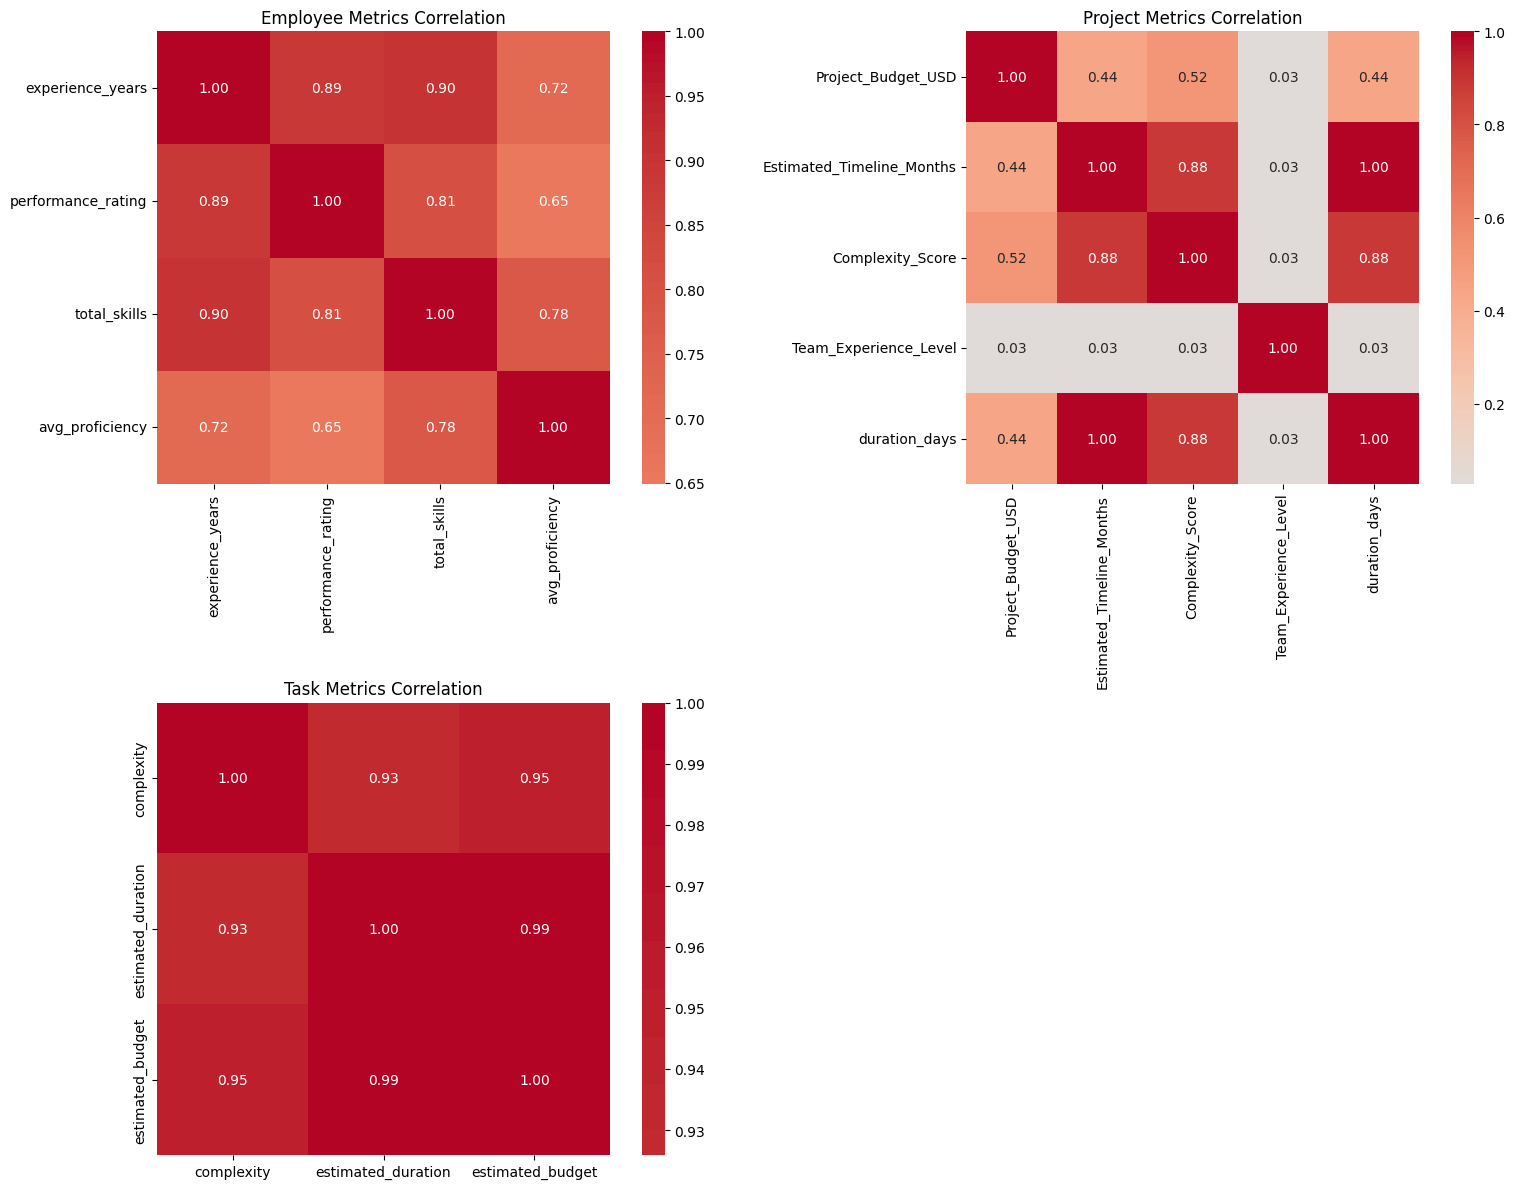

In [66]:
# Perform comprehensive correlation analysis

# Prepare data for correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Employee correlations
emp_corr = employees_df_clean[['experience_years', 'performance_rating', 'total_skills', 'avg_proficiency']].corr()
sns.heatmap(emp_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0,0], fmt='.2f', square=True)
axes[0,0].set_title('Employee Metrics Correlation')

# Project correlations
proj_columns = ['Project_Budget_USD', 'Estimated_Timeline_Months', 'Complexity_Score', 'Team_Experience_Level']
if 'duration_days' in projects_df_clean.columns:
    proj_columns.append('duration_days')

proj_corr = projects_df_clean[proj_columns].corr()
sns.heatmap(proj_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0,1], fmt='.2f', square=True)
axes[0,1].set_title('Project Metrics Correlation')

# Task correlations
task_corr = tasks_df_clean[['complexity', 'estimated_duration', 'estimated_budget']].corr()
sns.heatmap(task_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1,0], fmt='.2f', square=True)
axes[1,0].set_title('Task Metrics Correlation')

# delete the unwanted grid
fig.delaxes(axes[1,1])

plt.tight_layout()
plt.show()

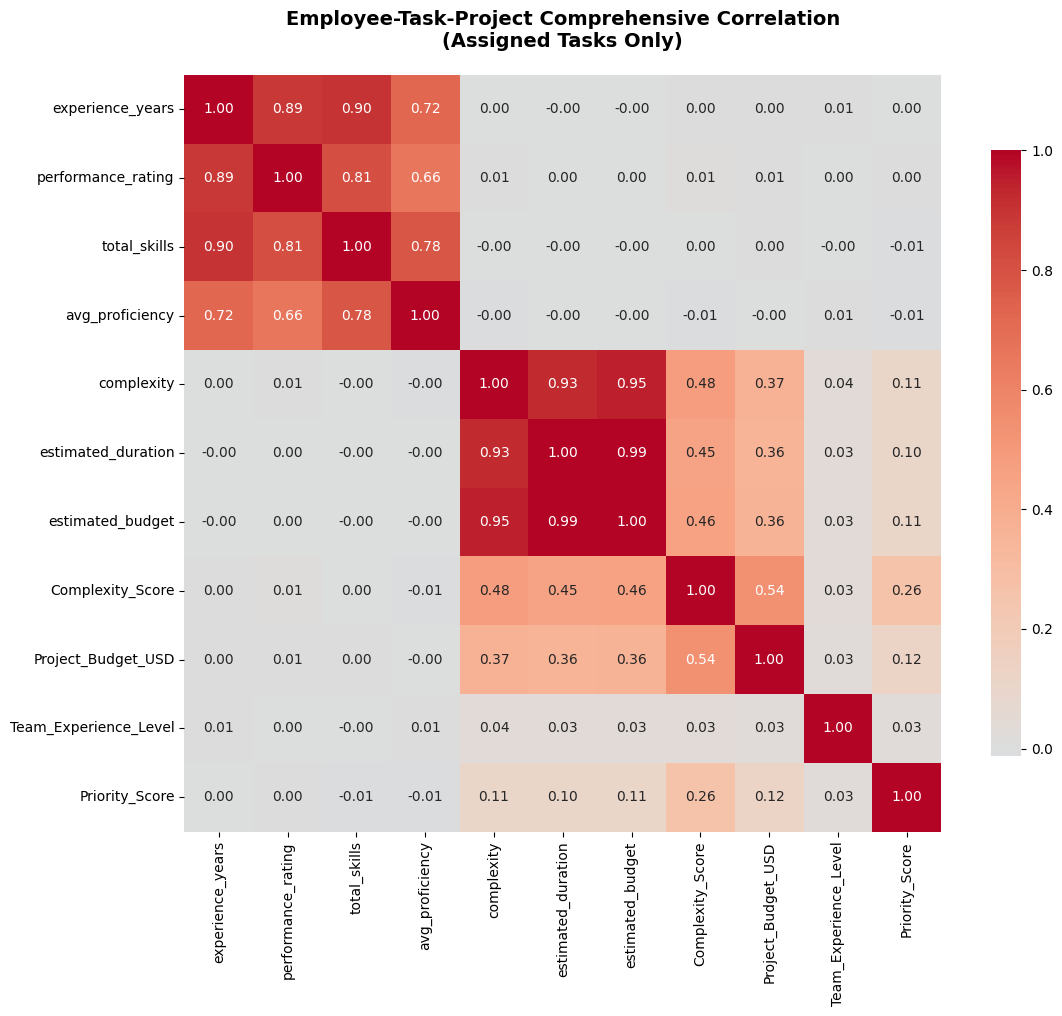

In [67]:

plt.figure(figsize=(12, 10))

# merge tasks with projects
tasks_with_projects = tasks_df_clean.merge(
    projects_df_clean[['project_id', 'Complexity_Score', 'Project_Budget_USD',
                      'Team_Experience_Level', 'Priority_Score']],
    on='project_id'
)

# Then merge with employee data for assigned tasks
assigned_tasks_with_data = tasks_with_projects[tasks_with_projects['assigned_to_id'].notna()].merge(
    employees_df_clean[['employee_id', 'experience_years', 'performance_rating', 'total_skills', 'avg_proficiency']],
    left_on='assigned_to_id', right_on='employee_id'
)

if len(assigned_tasks_with_data) > 0:
    # Select relevant columns for correlation
    correlation_columns = [
        # Employee metrics
        'experience_years', 'performance_rating', 'total_skills', 'avg_proficiency',
        # Task metrics
        'complexity', 'estimated_duration', 'estimated_budget',
        # Project metrics
        'Complexity_Score', 'Project_Budget_USD', 'Team_Experience_Level', 'Priority_Score'
    ]

    # Calculate comprehensive correlation
    comprehensive_corr = assigned_tasks_with_data[correlation_columns].corr()

    # Create the heatmap
    sns.heatmap(comprehensive_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True,
                cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})
    plt.title('Employee-Task-Project Comprehensive Correlation\n(Assigned Tasks Only)',
              fontsize=14, fontweight='bold', pad=20)

    # Add section labels
    #ax = plt.gca()
    # Employee section
    #ax.add_patch(plt.Rectangle((0, 0), 4, 4, fill=False, edgecolor='blue', linewidth=2))
    #ax.text(2, -0.5, 'Employee Metrics', ha='center', va='center', fontweight='bold', color='blue')

    # Task section
    #ax.add_patch(plt.Rectangle((4, 0), 3, 3, fill=False, edgecolor='green', linewidth=2))
    #ax.text(5.5, -0.5, 'Task Metrics', ha='center', va='center', fontweight='bold', color='green')

    # Project section
    #ax.add_patch(plt.Rectangle((7, 0), 5, 5, fill=False, edgecolor='red', linewidth=2))
    #ax.text(9.5, -0.5, 'Project Metrics', ha='center', va='center', fontweight='bold', color='red')

else:
    plt.text(0.5, 0.5, 'No assigned tasks available for comprehensive analysis',
            ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Employee-Task-Project Comprehensive Correlation')

plt.tight_layout()
plt.show()

# Saving Data to CSV files

In [68]:
# Save all datasets to CSV files
skills_df.to_csv('skills_catalog.csv', index=False)
employees_df.to_csv('employees.csv', index=False)
projects_df.to_csv('projects.csv', index=False)
tasks_df.to_csv('tasks.csv', index=False)

In [69]:
from google.colab import files
files.download('skills_catalog.csv')
files.download('employees.csv')
files.download('projects.csv')
files.download('tasks.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>